In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

C:\Users\My-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
df = pd.read_csv("C:/Users/My-PC/Daily-ML/Starter Notebooks/Banknote-authentication-dataset-.csv")
df.head()

,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


In [8]:
df.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


In [9]:
#Extracting values
x=df['V1']
y=df['V2']

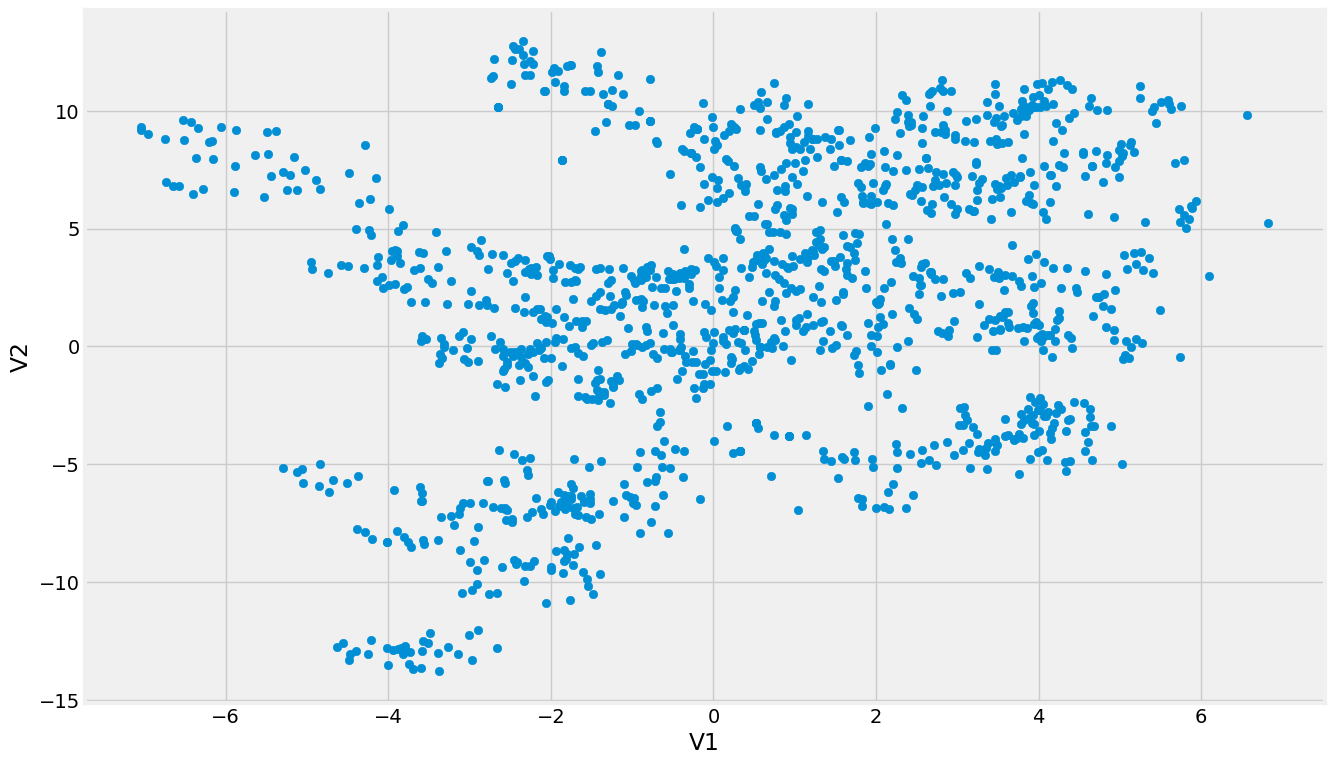

In [10]:
x = df["V1"]
y = df["V2"]
plt.figure(figsize=(16,9))
plt.style.use("fivethirtyeight")
plt.xlabel("V1")
plt.ylabel("V2")
plt.scatter(x,y)
plt.show()

In [11]:
# Let us check the range of our values. This could prove effective in building an accurate model
print("X_max : ",x.max())
print("X_min : ",x.min())
print("Y_max : ",y.max())
print("Y_min : ",y.min())

X_max :  6.8248
X_min :  -7.0421
Y_max :  12.9516
Y_min :  -13.7731


* The range between values in both features V1 and V2 is quite large. Hence there is a need to normalize the values in the dataset and bring it to a single range.
$N_v = (V-mean(arr))/(max(arr)-min(arr))$

* arr corresponds to all the values in the specific feature column. Nv is the new value obtained after normalization.

In [12]:
mean_x = x.mean()
print("Mean of X : ",mean_x)
mean_y = y.mean()
print("Mean of Y : ",mean_y)
std_x = x.std()
print("Standard deviation of X : ",std_x)
std_y = y.std()
print("Standard deviation of Y : ",std_y)
max_x = x.max()
print("Max of X : ",max_x)
max_y = y.max()
print("Max of Y : ",max_y)
min_x = x.min()
print("Min of X : ",min_x)
min_y = y.min()
print("Min of Y : ",min_y)

Mean of X :  0.43373525728862977
Mean of Y :  1.9223531209912539
Standard deviation of X :  2.8427625862451658
Standard deviation of Y :  5.869046743580378
Max of X :  6.8248
Max of Y :  12.9516
Min of X :  -7.0421
Min of Y :  -13.7731


In [13]:
# Performing normalization for both features
for i in range(0,x.size):
    x[i] = (x[i] - mean_x)/(max_x - min_x)
    
for i in range(0,y.size):
    y[i] = (y[i] - mean_y)/(max_y - min_y)

* Our data is now normalized and will proceed to KMeans

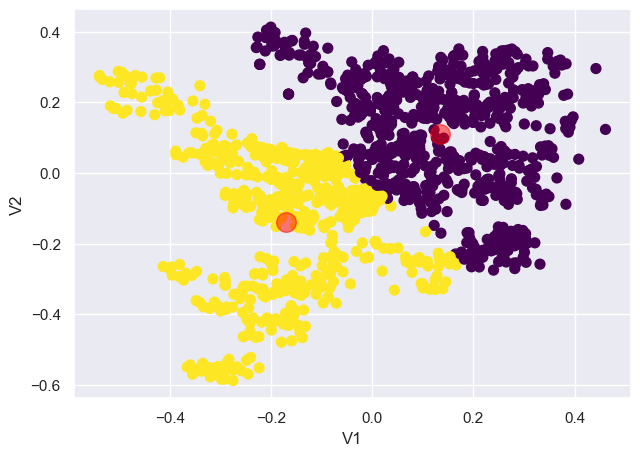

label
0    765
1    607
Name: count, dtype: int64

In [15]:
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()

X = df[["V1","V2"]]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X["V1"], X["V2"], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

# Get the labels and value counts
df["label"] = y_kmeans
df["label"].value_counts()

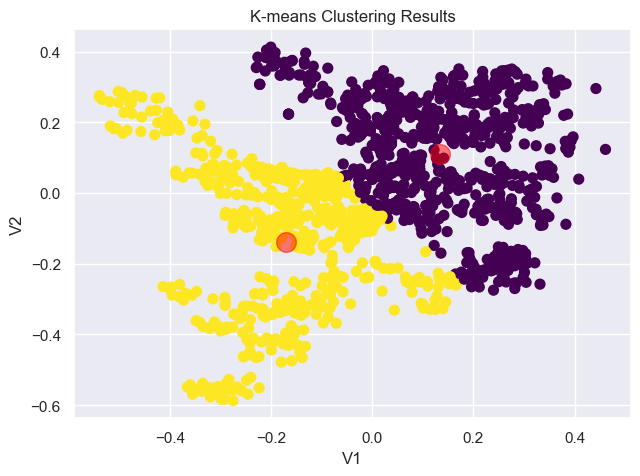

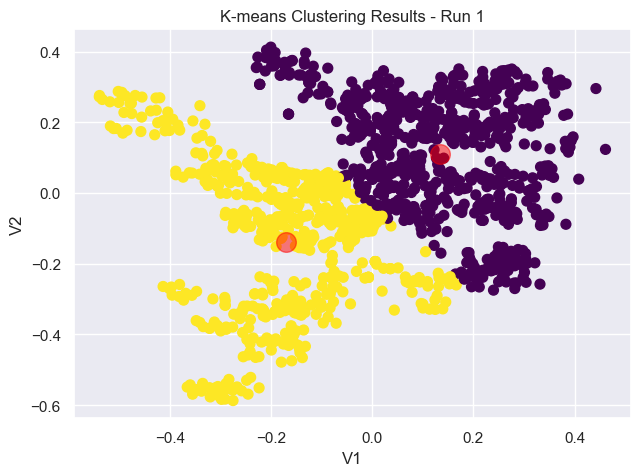

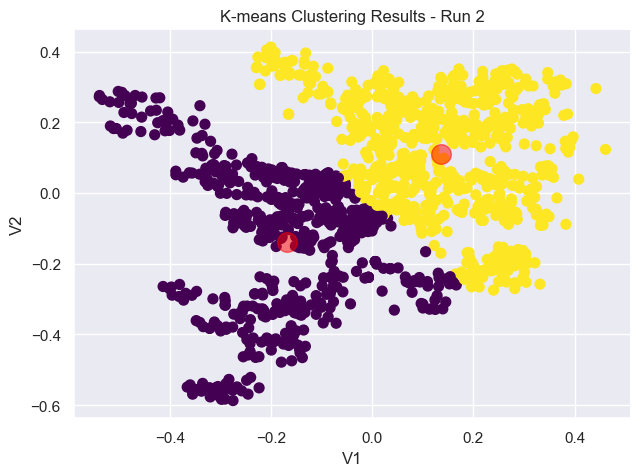

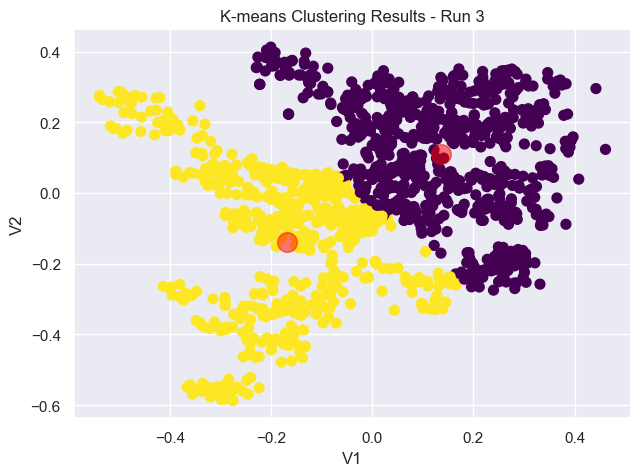

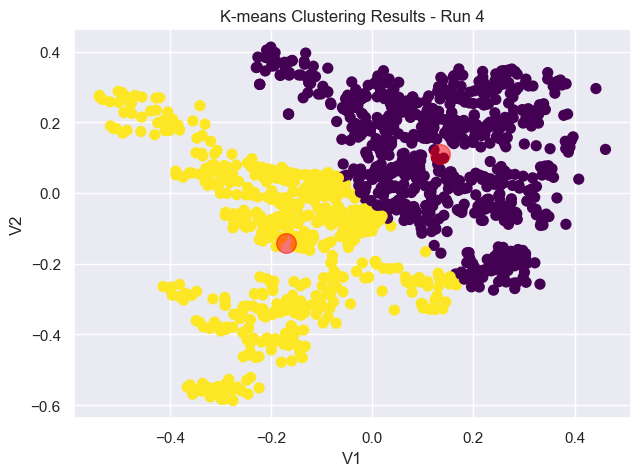

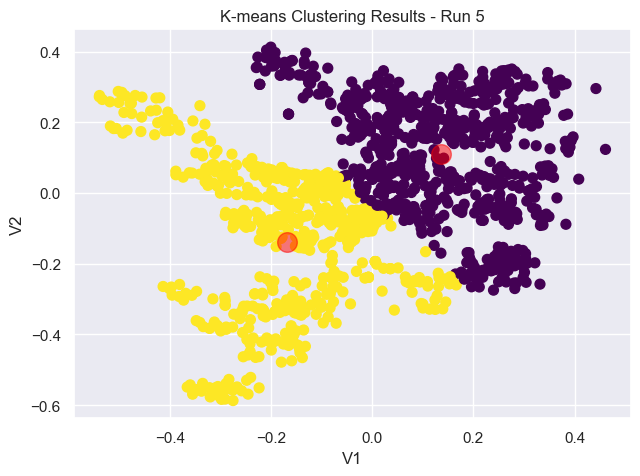

In [16]:
# Step 1: Run K-means on the given dataset
X = df[["V1","V2"]]
kmeans = KMeans(n_clusters=2, random_state=0)  # Set random_state for reproducibility
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Step 2: Visualize the results
plt.scatter(X["V1"], X["V2"], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title("K-means Clustering Results")
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

# Step 3: Re-run K-means several times and visualize the results
n_runs = 5  # Number of times to run K-means
for i in range(n_runs):
    kmeans = KMeans(n_clusters=2, random_state=i)  # Change random_state for different results
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)

    plt.scatter(X["V1"], X["V2"], c=y_kmeans, s=50, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
    plt.title(f"K-means Clustering Results - Run {i+1}")
    plt.xlabel("V1")
    plt.ylabel("V2")
    plt.show()